## Excercise 03: Distributions and patterns

The goals of this exercise are:
<ul>
<li>Exploration of distributions, identifying and interpreting patterns in distributions. </li>
<li>Exploration of temporal and spatial distributions of discrete entities using time histograms and maps. </li>
<li>Exploration of a joint distribution of multiple attributes over a set of entities using projection and partition-based clustering.</li>
</ul>

For a more detailed description, refer to the exercise description document.

A video demonstrating the analytical procedure as implemented in V-Analytics is: <a href=distributions.mp4>distributions.mp4</a>

If <i>folium</i> is not installed on your computer, execute the following command

<pre>conda install -c conda-forge folium geopandas tornado==4.5.3</pre>

In [2]:
import folium

ModuleNotFoundError: No module named 'folium'

## Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter

np.random.seed(123)

df = pd.read_csv('storm_tweets.csv')
df

ModuleNotFoundError: No module named 'folium'

## Transforming dates

In [2]:
df['msgdate']=pd.to_datetime(df['MESSAGEDATE'], format="%d/%m/%Y %H:%M:%S")
df.msgdate.head()

0   2015-03-27 06:14:46
1   2015-03-27 02:03:08
2   2015-03-27 04:29:32
3   2015-03-27 01:59:12
4   2015-03-27 05:43:08
Name: msgdate, dtype: datetime64[ns]

In [15]:
display(df)

,id,Name,X,Y,LONGITUDE,LATITUDE,MESSAGEDATE,USERSCREENNAME,MESSAGETEXT,LOCATION,...,keyword=collapse,keyword=ingury,keyword=disrupt,keyword=forecast,Mask,bad weather (sum),consequence (sum),bad weather,consequence,msgdate
0,581338551868063744,storm,0.071042,52.094433,0.071042,52.094433,2015-03-27 06:14:46,Willis12Pat,Love retirement! My day.. The 7's taping the ...,Fowlmere; England,...,0,0,0,0,10000000000,1.0,0.0,1.0,0.0,2015-03-27 06:14:46
1,581275225955893249,collapse,-0.210674,51.478096,-0.210674,51.478096,2015-03-27 02:03:08,Daiz11,Fyi if the brightside remix is played in Londo...,Hammersmith; London,...,1,0,0,0,1000,0.0,1.0,0.0,1.0,2015-03-27 02:03:08
2,581312068629954560,wind,-3.086356,53.060090,-3.086356,53.060089,2015-03-27 04:29:32,secondhand_shed,@tonywilliams68 @wrexham strong winds sorry ;i...,Minera; Wales,...,0,0,0,0,1000000000,1.0,0.0,1.0,0.0,2015-03-27 04:29:32
3,581274239308832769,flood,-1.118795,52.617813,-1.118795,52.617813,2015-03-27 01:59:12,DrJonMillett,@Leicester_Merc New street lamp is like living...,Leicester; England,...,0,0,0,0,100000,0.0,1.0,0.0,1.0,2015-03-27 01:59:12
4,581330592920444928,flood,-0.651385,51.902275,-0.651385,51.902275,2015-03-27 05:43:08,VirtualJukebox,The Flood by Cheryl Cole is #nowplaying in Any...,East; England,...,0,0,0,0,100000,0.0,1.0,0.0,1.0,2015-03-27 05:43:08
5,581347370438393856,storm,-0.462822,53.219820,-0.462822,53.219818,2015-03-27 06:49:48,CunninghamKian,The calm before the storm ... http://t.co/7Pv5...,Washingborough; England,...,0,0,0,0,10000000000,1.0,0.0,1.0,0.0,2015-03-27 06:49:48
6,581328032511709184,collapse;forecast,-1.537833,53.387165,-1.537833,53.387165,2015-03-27 05:32:58,deffmick,@SkyNews Something fishy here ! Usually; tall...,Yorkshire and The Humber; England,...,1,0,0,1,1001,0.0,1.0,0.0,1.0,2015-03-27 05:32:58
7,581268046955806720,storm,-1.584887,52.778570,-1.584887,52.778568,2015-03-27 01:34:36,_katiegreen__,stormzy / mievado,Swadlincote; England,...,0,0,0,0,10000000000,1.0,0.0,1.0,0.0,2015-03-27 01:34:36
8,581346808099684352,disrupt,0.012129,50.870740,0.012129,50.870739,2015-03-27 06:47:34,philhillslewes,@NRE_Southern @brightonstation what about disr...,Lewes; England,...,0,0,1,0,10,0.0,1.0,0.0,1.0,2015-03-27 06:47:34
9,581270572723634176,forecast,0.252533,51.511170,0.252533,51.511169,2015-03-27 01:44:38,TheMockneyRebel,Guardian/ICM survey puts Labour in line to gai...,Aveley; England,...,0,0,0,1,1,0.0,0.0,0.0,0.0,2015-03-27 01:44:38


In [11]:
df['MESSAGEDATE'] = pd.to_datetime(df['MESSAGEDATE'], format='%d/%m/%Y %H:%M:%S')
print('The column MESSAGEDATE is of type :', df.MESSAGEDATE.dtype)
print('The min value of MESSAGEDATE is', df.MESSAGEDATE.min(), 'whereas the max is :', df.MESSAGEDATE.max())

The column MESSAGEDATE is of type : datetime64[ns]
The min value of MESSAGEDATE is 2015-03-27 00:05:49 whereas the max is : 2015-04-02 13:40:59


The index type of the dataframe is <class 'pandas.core.indexes.datetimes.DatetimeIndex'> 

The highest value of the hourly count was 72 and was reached on 2015-03-30 23:00:00


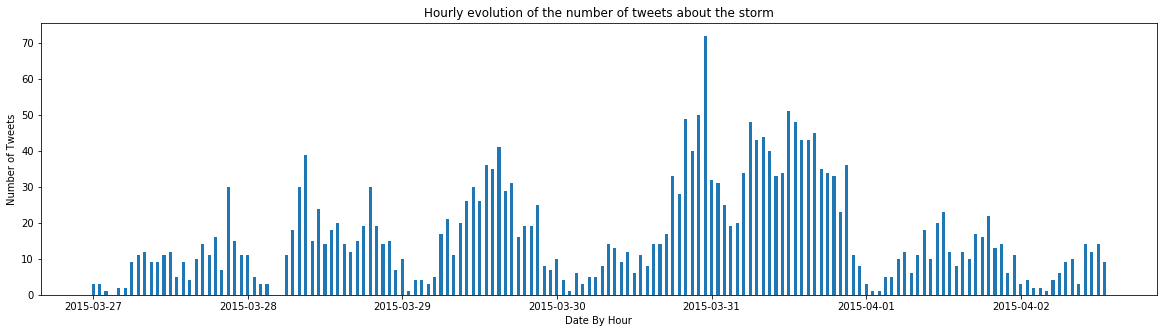

In [17]:
# In order to inspect temporal distribution and aggregate the time attribute flexibly,
# it's interesting to set the MESSAGEDATE column as an index of the dataframe, this will allow us to use the 
# powerful resample() method !
df.set_index(df['MESSAGEDATE'], inplace=True)
print('The index type of the dataframe is', type(df.index), '\n')# Let's refine the analysis by inspecting the temporal distribution by HOUR
df_count_hourly = df.resample('H').count()[['MESSAGETEXT']]

# Display the peak of the hourly count
print('The highest value of the hourly count was', df_count_hourly.MESSAGETEXT.max(), 'and was reached on', df_count_hourly.MESSAGETEXT.idxmax())

# Visualize the evolution
plt.figure(figsize = (20, 5))
plt.xlabel('Date By Hour')
plt.ylabel('Number of Tweets')
plt.title('Hourly evolution of the number of tweets about the storm')
plt.bar(df_count_hourly.index, df_count_hourly.values.flatten(), width = 0.02);

In [18]:
display(df_count_hourly)

,MESSAGETEXT
MESSAGEDATE,
2015-03-27 00:00:00,3
2015-03-27 01:00:00,3
2015-03-27 02:00:00,1
2015-03-27 03:00:00,0
2015-03-27 04:00:00,2
2015-03-27 05:00:00,2
2015-03-27 06:00:00,9
2015-03-27 07:00:00,11
2015-03-27 08:00:00,12


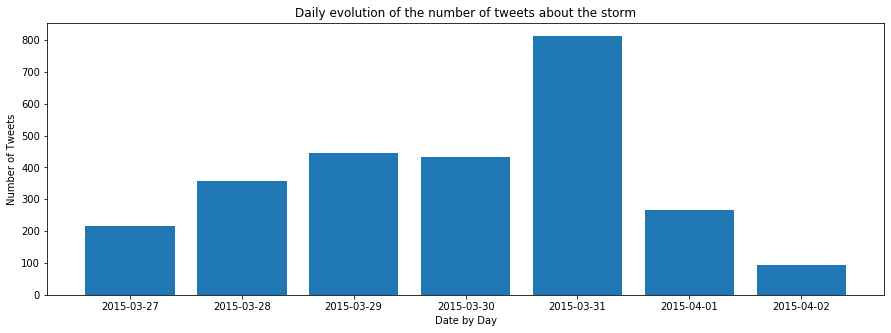

In [20]:
# In order to inspect temporal distribution and aggregate the time attribute flexibly,
# it's interesting to set the MESSAGEDATE column as an index of the dataframe, this will allow us to use the 
# powerful resample() method !
#df.set_index(df['MESSAGEDATE'], inplace=True)
#print('The index type of the dataframe is', type(df.index), '\n')

# Inspecting the temporal distribution by DAY
df_count_daily = df.resample('D').count()[['MESSAGETEXT']]

# Visualize the evolution
plt.figure(figsize = (15, 5))
plt.xlabel('Date by Day')
plt.ylabel('Number of Tweets')
plt.title('Daily evolution of the number of tweets about the storm')
plt.bar(df_count_daily.index, df_count_daily.values.flatten());

In [21]:
display(df_count_daily)

,MESSAGETEXT
MESSAGEDATE,
2015-03-27,216
2015-03-28,356
2015-03-29,444
2015-03-30,432
2015-03-31,813
2015-04-01,266
2015-04-02,93


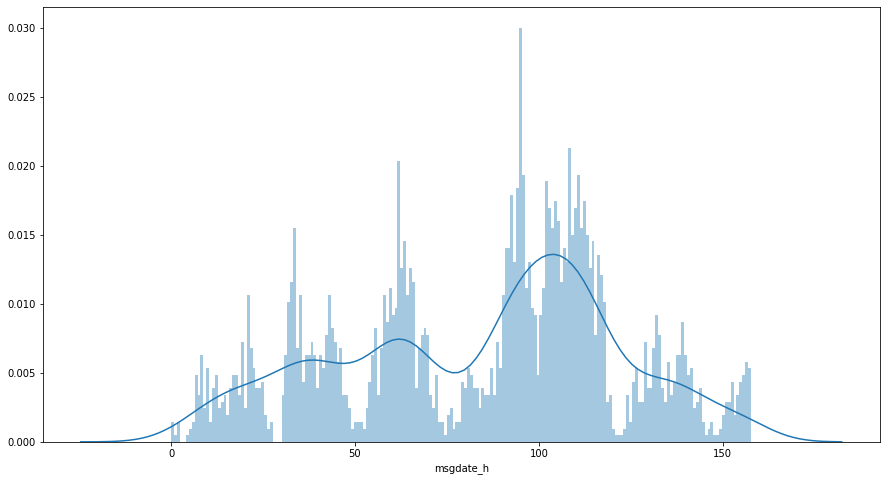

In [29]:
#Using Seaborn to make nicer plots + using KDE (kernal density estimate)
plt.figure(figsize=(15,8))
df['msgdate_h']=(pd.to_datetime(df.msgdate)-pd.to_datetime(df.msgdate.min().date())).astype('int64')/1000000000/3600

sns.distplot(df.msgdate_h, bins=200)
# sns.distplot(df.msgdate_h, bins=range(0,df.msgdate_h.max().round().astype('int64')+1,1));

In [23]:
7*24

168

## How do tweets develop over time?

We are interested to know if tweets with keywords follow different trends, so we want to plot them on one chart to see the distribution:


In [ ]:
# Listing keywords
keywords = ['keyword=storm', 'keyword=wind', 'keyword=rain', 'keyword=snow', 'keyword=hail', 'keyword=flood',
            'keyword=road', 'keyword=collapse', 'keyword=ingury', 'keyword=disrupt', 'keyword=forecast']
# Visualizing the total occurence of the keywords
plt.figure(figsize=(20, 5))
plt.xlabel('Keywords')
plt.ylabel('Tweets count')
plt.title('Total number of tweets containing each keyword')
plt.bar(keywords, df[keywords].sum());

In [ ]:
#Plotting different tweet types on same distribution
plt.figure(figsize=(15,8))
#sns.kdeplot(df.msgdate_h, label="Totals")
sns.kdeplot(df[df['keyword=rain']==1].msgdate_h, label="Rain")
sns.kdeplot(df[df['keyword=collapse']==1].msgdate_h, label="Collapse")
sns.kdeplot(df[df['keyword=forecast']==1].msgdate_h, label="Forecast")
sns.kdeplot(df[df['keyword=wind']==1].msgdate_h, label="Wind")
sns.kdeplot(df[df['keyword=flood']==1].msgdate_h, label="Flood")
sns.kdeplot(df[df['keyword=disrupt']==1].msgdate_h, label="Disrupt")
plt.legend();

## Investigate spatial distribution and spatial density

In [ ]:
xmm=(df.X.min()+df.X.max())/2
ymm=(df.Y.min()+df.Y.max())/2
map = folium.Map(location=[ymm,xmm], zoom_start=5)
df.apply(lambda row:folium.CircleMarker(location=[row["Y"], row["X"]], radius=3).add_to(map), axis=1)
map

### For assessing spatial distribution, let's replace dots by a density map (a.k.a. heatmap)

In [ ]:
xmm=(df.X.min()+df.X.max())/2
ymm=(df.Y.min()+df.Y.max())/2
hmap = folium.Map(location=[ymm,xmm], zoom_start=5)
hm_wide = HeatMap(list(zip(df.LATITUDE.values, df.LONGITUDE.values)), 
                  min_opacity=0.2,
                  radius=17, blur=15, 
                  max_zoom=1)
hmap.add_child(hm_wide)

To avoid oversmoothing, we need different parameters

In [ ]:
xmm=(df.X.min()+df.X.max())/2
ymm=(df.Y.min()+df.Y.max())/2
hmap = folium.Map(location=[ymm,xmm], zoom_start=6)
hm_wide = HeatMap(list(zip(df.LATITUDE.values, df.LONGITUDE.values)), 
                  min_opacity=0.2,
                  radius=5, blur=10, #Adjusting the radius will make areas more distict, and reducing blur will make map clearer!
                  max_zoom=1)
hmap.add_child(hm_wide)

The majority of tweets are centred around the big cities (London, Manchester, Norwich, Dublin, Edinburgh & Newcastle).
It's quite difficult to distiguish the intensity between areas where there are a high number of tweets, therefore a different colour scheme could help...

In [ ]:
xmm=(df.X.min()+df.X.max())/2
ymm=(df.Y.min()+df.Y.max())/2
hmap = folium.Map(location=[ymm,xmm], zoom_start=7)
hm_wide = HeatMap(list(zip(df.LATITUDE.values, df.LONGITUDE.values)), 
                   min_opacity=0.2,
                   radius=7, blur=10, 
                   max_zoom=1, gradient={.6: 'blue', .9: 'orange', 1: 'red'}) 
hmap.add_child(hm_wide)

Another approach is to use a Marker Cluster which will aggregate the tweets for an area, dependent on the zoom - this can help distinguishing between dense areas.

In [ ]:
from folium.plugins import MarkerCluster
map2 = folium.Map(location=[ymm,xmm], zoom_start=6)
marker_cluster = folium.plugins.MarkerCluster().add_to(map2)
df.apply(lambda row:folium.Marker(location=[row["Y"], row["X"]])
                                             .add_to(marker_cluster), axis=1)
map2
## Click on the circles to zoom in and interact!

MarkerCluster applies clustering of points according to their coordinates, taking into account current zoom level. 

In the following cells we shall explore how clustering and projections can be applied for studyng distributions in multidimensional spaces.

# Principal components, projections, and clustering
continued in the next notebook:<br> 
<a href=2019-03cont.ipynb>2019-03cont.ipynb</a> (notebook)<br>
<a href=2019-03cont.html>2019-03cont.html</a> (HTML version)